## Imports

In [1]:
import numpy as np

from src.lstm_model import LSTMModel
from src.imdb_data_loader import IMDBDataLoader
from src.load_data import prepare_data, load_vectors
from src.train_test import train, test, eval_epoch
from src.hyperparam_optimizers.grid_search import GridSearchOptimizer
from src.hyperparam_optimizers.random_search import RandomSearchOptimizer
from src.hyperparam_optimizers.hyperopt import HyperoptOptimizer
from src.hyperparam_optimizers.skopt import SkoptOptimizer
from src.hyperparam_optimizers.optuna import OptunaOptimizer

%load_ext autoreload
%autoreload 2

# Hyperparams

In [2]:
params_grid = {
    'hidden_size': [64, 128, 256, 512],
    'num_layers': [1, 2],
    'dropout': [0.5],
    'bidirectional': [True, False],
    'batch_size': [64, 256],
    'lr': [1e-3, 1e-2, 1e-1]
}

## GridSearch

In [3]:
gs_optimizer = GridSearchOptimizer()
gs_optimizer.optimize('checkpoints', params_grid, i_epoch=20)
print(f'Best params: {gs_optimizer.best_params}')
print(f'Best loss: {gs_optimizer.best_loss}')
print(f'Best acc: {gs_optimizer.best_accuracy}')
print(f'Test acc: {gs_optimizer.test_accuracy}')
print(f'Total time: {gs_optimizer.total_time}')
print(f'Number of iterations: {len(gs_optimizer)}')

Grid search params: 100%|██████████| 96/96 [00:00<00:00, 6838.31it/s]

Best params: (256, 2, 0.5, True, 256, 0.01)
Best loss: 0.6289280581474305
Best acc: 0.90576
Test acc: 0.89716
Total time: 130357.8394780159
Number of iterations: 96


## Random Search

In [13]:
rs_optimizer = RandomSearchOptimizer(96)
rs_optimizer.optimize('checkpoints', params_grid, i_epoch=20)
print(f'Best params: {rs_optimizer.best_params}')
print(f'Best loss: {rs_optimizer.best_loss}')
print(f'Best acc: {rs_optimizer.best_accuracy}')
print(f'Test acc: {rs_optimizer.test_accuracy}')
print(f'Total time: {rs_optimizer.total_time}')
print(f'Number of iterations: {len(rs_optimizer)}')

Random search iters: 100%|██████████| 96/96 [00:00<00:00, 6439.46it/s]

Best params: (256, 2, 0.5, True, 256, 0.01)
Best loss: 0.6289280581474305
Best acc: 0.90576
Test acc: 0.89716
Total time: 78777.29653167725
Number of iterations: 96


## Hyperopt

In [14]:
hyperopt_optimizer = HyperoptOptimizer(96)
hyperopt_optimizer.optimize('checkpoints', params_grid, i_epoch=20)
print(f'Best params: {hyperopt_optimizer.best_params}')
print(f'Best loss: {hyperopt_optimizer.best_loss}')
print(f'Best acc: {hyperopt_optimizer.best_accuracy}')
print(f'Test acc: {hyperopt_optimizer.test_accuracy}')
print(f'Total time: {hyperopt_optimizer.total_time}')
print(f'Number of iterations: {len(hyperopt_optimizer)}')

100%|██████████| 96/96 [00:00<00:00, 160.41trial/s, best loss: 0.09743999999999997]
Best params: [128, 2, 0.5, False, 64, 0.001]
Best loss: 0.2725812367790816
Best acc: 0.90256
Test acc: 0.90312
Total time: 57903.88773584366
Number of iterations: 96


## Scikit-optimize

In [15]:
skopt_optimizer = SkoptOptimizer(96, 'gp_hedge')
skopt_optimizer.optimize('checkpoints', params_grid, i_epoch=20)
print(f'Best params: {skopt_optimizer.best_params}')
print(f'Best loss: {skopt_optimizer.best_loss}')
print(f'Best acc: {skopt_optimizer.best_accuracy}')
print(f'Test acc: {skopt_optimizer.test_accuracy}')
print(f'Total time: {skopt_optimizer.total_time}')
print(f'Number of iterations: {len(skopt_optimizer)}')

/home/local/AP-TEAM/ostroukhov/.pyenv/versions/habr/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/local/AP-TEAM/ostroukhov/.pyenv/versions/habr/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/local/AP-TEAM/ostroukhov/.pyenv/versions/habr/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/local/AP-TEAM/ostroukhov/.pyenv/versions/habr/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/local/AP-TEAM/ostroukhov/.pyenv/versions/habr/lib/python3.

Best params: [64, 2, 0.5, True, 256, 0.01]
Best loss: 0.6882877457141876
Best acc: 0.904
Test acc: 0.90056
Total time: 61869.252845048904
Number of iterations: 96


In [16]:
skopt_optimizer = SkoptOptimizer(96, 'LCB')
skopt_optimizer.optimize('checkpoints', params_grid, i_epoch=20)
print(f'Best params: {skopt_optimizer.best_params}')
print(f'Best loss: {skopt_optimizer.best_loss}')
print(f'Best acc: {skopt_optimizer.best_accuracy}')
print(f'Test acc: {skopt_optimizer.test_accuracy}')
print(f'Total time: {skopt_optimizer.total_time}')
print(f'Number of iterations: {len(skopt_optimizer)}')

/home/local/AP-TEAM/ostroukhov/.pyenv/versions/habr/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/local/AP-TEAM/ostroukhov/.pyenv/versions/habr/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/local/AP-TEAM/ostroukhov/.pyenv/versions/habr/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/local/AP-TEAM/ostroukhov/.pyenv/versions/habr/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/local/AP-TEAM/ostroukhov/.pyenv/versions/habr/lib/python3.

Best params: [256, 2, 0.5, True, 256, 0.01]
Best loss: 0.6289280581474305
Best acc: 0.90576
Test acc: 0.89716
Total time: 73422.07783913612
Number of iterations: 96


## Optuna

In [17]:
optuna_optimizer = OptunaOptimizer(96)
optuna_optimizer.optimize('checkpoints', params_grid, i_epoch=20)
print(f'Best params: {optuna_optimizer.best_params}')
print(f'Best loss: {optuna_optimizer.best_loss}')
print(f'Best acc: {optuna_optimizer.best_accuracy}')
print(f'Test acc: {optuna_optimizer.test_accuracy}')
print(f'Total time: {optuna_optimizer.total_time}')
print(f'Number of iterations: {len(optuna_optimizer)}')

[I 2020-10-23 12:53:41,991] A new study created in memory with name: no-name-4a854d7c-4617-4e7b-8cd6-9dec24fa83ce
/home/local/AP-TEAM/ostroukhov/.pyenv/versions/habr/lib/python3.6/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


[I 2020-10-23 12:53:42,010] Trial 0 finished with value: 0.50256 and parameters: {'hidden_size': 256, 'num_layers': 2, 'dropout': 0.5, 'bidirectional': True, 'batch_size': 64, 'lr': 0.1}. Best is trial 0 with value: 0.50256.
[I 2020-10-23 12:53:42,012] Trial 1 finished with value: 0.0 and parameters: {'hidden_size': 512, 'num_layers': 1, 'dropout': 0.5, 'bidirectional': True, 'batch_size': 64, 'lr': 0.01}. Best is trial 0 with value: 0.50256.
[I 2020-10-23 12:53:42,014] Trial 2 finished with value: 0.87264 and parameters: {'hidden_size': 256, 'num_layers': 1, 'dropout': 0.5, 'bidirectional': True, 'batch_size': 64, 'lr': 0.001}. Best is trial 2 with value: 0.87264.
[I 2020-10-23 12:53:42,017] Trial 3 finished with value: 0.0 and parameters: {'hidden_size': 512, 'num_layers': 2, 'dropout': 0.5, 'bidirectional': False, 'batch_size': 64, 'lr': 0.01}. Best is trial 2 with value: 0.87264.
[I 2020-10-23 12:53:42,020] Trial 4 finished with value: 0.88944 and parameters: {'hidden_size': 64, 'n

# Plots

In [18]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

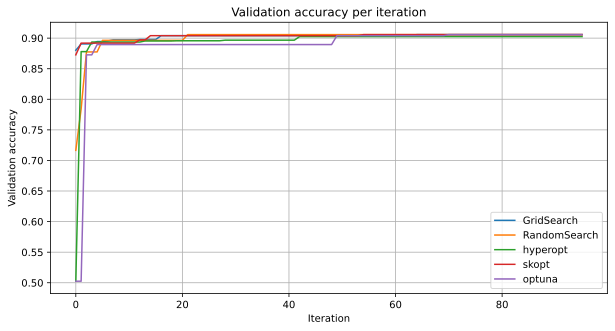

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(gs_optimizer)), gs_optimizer.best_accuracy_track, label='GridSearch')
plt.plot(range(len(rs_optimizer)), rs_optimizer.best_accuracy_track, label='RandomSearch')
plt.plot(range(len(hyperopt_optimizer)), hyperopt_optimizer.best_accuracy_track, label='hyperopt')
plt.plot(range(len(skopt_optimizer)), skopt_optimizer.best_accuracy_track, label='skopt')
plt.plot(range(len(optuna_optimizer)), optuna_optimizer.best_accuracy_track, label='optuna')
plt.xlabel('Iteration')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy per iteration')
plt.legend()
plt.grid()
plt.savefig('acc_iter.jpg', format='jpg')

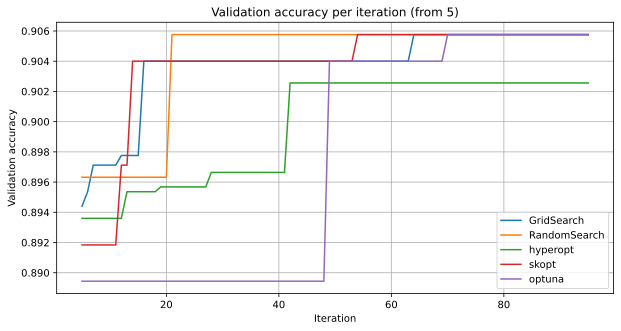

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(range(5, len(gs_optimizer)), gs_optimizer.best_accuracy_track[5:], label='GridSearch')
plt.plot(range(5, len(rs_optimizer)), rs_optimizer.best_accuracy_track[5:], label='RandomSearch')
plt.plot(range(5, len(hyperopt_optimizer)), hyperopt_optimizer.best_accuracy_track[5:], label='hyperopt')
plt.plot(range(5, len(skopt_optimizer)), skopt_optimizer.best_accuracy_track[5:], label='skopt')
plt.plot(range(5, len(optuna_optimizer)), optuna_optimizer.best_accuracy_track[5:], label='optuna')
plt.xlabel('Iteration')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy per iteration (from 5)')
plt.legend()
plt.grid()
plt.savefig('acc_iter_5.jpg', format='jpg')

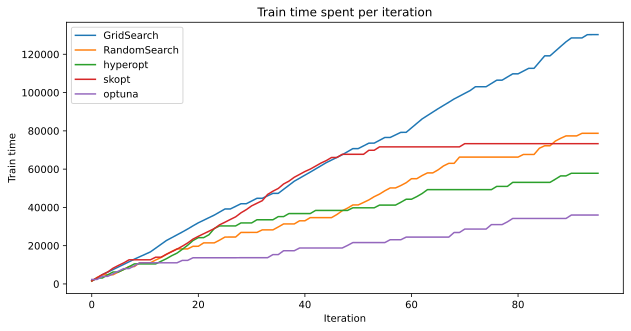

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(gs_optimizer)), gs_optimizer.train_time_track, label='GridSearch')
plt.plot(range(len(rs_optimizer)), rs_optimizer.train_time_track, label='RandomSearch')
plt.plot(range(len(hyperopt_optimizer)), hyperopt_optimizer.train_time_track, label='hyperopt')
plt.plot(range(len(skopt_optimizer)), skopt_optimizer.train_time_track, label='skopt')
plt.plot(range(len(optuna_optimizer)), optuna_optimizer.train_time_track, label='optuna')
plt.xlabel('Iteration')
plt.ylabel('Train time')
plt.title('Train time spent per iteration')
plt.legend()
plt.savefig('time_iter.jpg', format='jpg')